<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by Leonardo Cotta*



<img alt="Rio De Janeiro by Free Pik" width="100%" src="https://raw.githubusercontent.com/LeonardoCDP/Data-Science/master/Imagens/Rio_Janeiro.jpg">

# Analisando a Violência no Rio de Janeiro



**Rio de Janeiro** um dos cartões postais do **Brasil** com varios pontos turisticos e suas belas praias, com um população estimada de 17.264.943 pessoas tendo a desidade demografica de 365,23 habitantes por kilometro quadrado abragindo a area de 43.750,527 Km² com um total de 6.725.882 veiculos registrados segundo o IBGE (2019).
 
Infelizmento como nem tudo e um mar de rosas iremos analisar os indices de violencia disponibilizados pelo **Governo do Estado do Rio de Jaeniro**. 





## Obtenção dos Dados

Utilizaremos a Base de dados sobre a criminalidade no **Rio de Janeiro** disponibilizada pela **Policia Militar do Rio de Janeiro**

A base de dados original encontra-se neste link para consulta-la [Clique Aqui](http://www.ispdados.rj.gov.br/estatistica.html).



### Importando os dados


In [273]:
# importando as bibliotecas que iremos utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

# importando os dados e criando o DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

## Análise Inicial dos Dados

Iremos realizar uma análise exploratoria no dados disponibilizados pelo **Governo do Estado do Rio de Janeiro** da base de dados da **Policia Militar do Estado do Rio de Janeiro** sobre o indice de criminalidade.

A base de dados utilizada encontra-se neste link para acessa-la [Clique Aqui](http://www.ispdados.rj.gov.br/estatistica.html).

E disponbilizado um painel interativo no site do **Governo do Estado do Rio de Janeiro** para acessa-lo [Clique aqui](http://www.ispvisualizacao.rj.gov.br/index.html)

In [274]:
# analisando o tamanho do DataFrame
print('Colunas e Linhas no DataFrame: ')
print(f'{df.shape[1]} Colunas')
print(f'{df.shape[0]} Linhas')

Colunas e Linhas no DataFrame: 
56 Colunas
344 Linhas


Nosso DataFrame possui 344 Linhas e 56 Colunas

In [275]:
# imprimindo o nome das colunas presente no DataFrame
print('Nome das Colunas Presente no DataFrame: ')
df.columns

Nome das Colunas Presente no DataFrame: 


Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [276]:
# verificando os tipos das colunas presente no DataFrame
print('Nome da coluna        \t        Tipo')
df.dtypes

Nome da coluna        	        Tipo


vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [277]:
# verificando a quantidade de cada tipo de coluna presente no DataFrame
print('Tipo   \t   Quantidade')
df.dtypes.value_counts()

Tipo   	   Quantidade


float64    30
int64      26
dtype: int64

O DataFrame possui 30 colunas do tipo **Decimal** e 26 colunas do tipo **Inteiro**

In [278]:
# visualizando as 5 primeiras linhas do DataFrame
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Podemos notar a presença de valores ausentes no DataFrame

In [279]:
# verificando a presença de dados ausentes no DataFrame
print('Colunas         \t      Porcentagem')
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Colunas         	      Porcentagem


roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

O Nosso DataFrame possui muitas colunas com dados ausentes ou nulos sento elas:
* roubo_bicicleta e furto_bicicleta  com 80% dos dados ausentes
* apreensao_drogas_sem_autor, posse_drogas, apf, aaapai,cmp, trafico_drogas, cmba com 52% dos dados ausentes
* sequestro_relampago, furto_coletivo, extorsao,furto_celular, roubo_apos_saque, roubo_conducao_saque, roubo_cx_eletronico, estupro, estelionato, pol_civis_mortos_serv, pol_militares_mortos_serv dos dados ausentes 41%
* pessoas_desaparecidas e encontro_ossada com 38% dos dados ausentes
* roubo_celular com 31% dos dados ausentes
* lesao_corp_culposa, ameaca, sequestro, lesao_corp_morte, registro_ocorrencias com 27% dos dados ausentes
* hom_por_interv_policial e hom_culposo com 24% dos dados ausentes

Iremos remover as colunas com dados ausentes do DateFrame pois utilizaremos os indeces completos para uma melhor análise exploratoria.


In [280]:
# removendo colunas com dados ausentes ou nulos
df_clear = df.dropna(axis=1)

In [281]:
# verificando se a colunas com valores ausentes foram removidas
print('Colunas \t Numero de dados ausentes')
df_clear.isnull().sum()

Colunas 	 Numero de dados ausentes


vano                    0
mes                     0
hom_doloso              0
latrocinio              0
tentat_hom              0
lesao_corp_dolosa       0
roubo_comercio          0
roubo_residencia        0
roubo_veiculo           0
roubo_carga             0
roubo_transeunte        0
roubo_em_coletivo       0
roubo_banco             0
outros_roubos           0
total_roubos            0
furto_veiculos          0
furto_transeunte        0
outros_furtos           0
total_furtos            0
apreensao_drogas        0
recuperacao_veiculos    0
encontro_cadaver        0
indicador_letalidade    0
indicador_roubo_rua     0
indicador_roubo_veic    0
fase                    0
dtype: int64

Agora com o DataFrame sem valores nulos ou ausentes iremos proseguir com a analise.

## Informações Estatísticas da Violência no Rio de Janeiro

Analisaremos os indices de roubo, furto e recuperação de veiculos os indeces de homicidios dolosos no estado, descobrindo o media de cada indece, a porcentagem de veiculos recuperados em relação a quantidade de veiculos roubados e furtados e o maior e menor numero registrador de homicidio ocorrido no periodo(mensal).


Visualizando o resumo estatistico de cada coluna obtendo os valores totais do periodo.

In [282]:
# visualizando o resumo estatístico do DataFrame
df_clear.describe()

,vano,mes,hom_doloso,latrocinio,tentat_hom,lesao_corp_dolosa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,outros_furtos,total_furtos,apreensao_drogas,recuperacao_veiculos,encontro_cadaver,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,fase
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,2004.837209,6.453488,504.555233,15.668605,318.267442,5492.799419,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,1211.223837,9428.119186,1674.671512,1518.921512,5994.328488,10433.177326,1071.930233,1772.238372,66.261628,577.691860,4734.738372,2448.697674,2.994186
std,8.289036,3.447759,113.774481,5.861427,127.606645,1514.220579,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,800.576723,4578.013053,294.852020,971.853102,1964.767779,3696.725756,643.381991,656.761843,34.464519,104.973929,3204.054864,789.689559,0.076138
min,1991.000000,1.000000,272.000000,2.000000,122.000000,2350.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,2322.000000,4691.000000,80.000000,729.000000,0.000000,334.000000,1086.000000,1097.000000,2.000000
25%,1998.000000,3.000000,413.750000,11.000000,200.000000,4067.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,811.750000,5107.750000,1430.500000,732.000000,3978.000000,6700.250000,714.500000,1276.750000,42.000000,500.000000,1557.000000,1889.750000,3.000000
50%,2005.000000,6.000000,507.000000,15.000000,318.500000,5830.500000,433.500000,125.000000,2322.000000,285.500000,2788.500000,592.000000,4.500000,1154.000000,9243.500000,1637.500000,1076.500000,6559.000000,10448.500000,979.500000,1755.000000,60.500000,590.000000,4190.000000,2322.000000,3.000000
75%,2012.000000,9.000000,577.250000,19.000000,398.250000,6582.500000,536.250000,151.250000,2778.000000,401.250000,5385.250000,784.000000,14.000000,1635.000000,11590.500000,1833.250000,2334.250000,7601.500000,13877.500000,1546.000000,2202.000000,87.000000,649.000000,6872.750000,2778.000000,3.000000
max,2019.000000,12.000000,831.000000,36.000000,645.000000,9050.000000,914.000000,300.000000,5358.000000,1329.000000,9669.000000,1628.000000,54.000000,3661.000000,23203.000000,2630.000000,5368.000000,9880.000000,18003.000000,2543.000000,3695.000000,217.000000,848.000000,13833.000000,5358.000000,3.000000


Iremos analisar a media dos veiculos roubados, furtados e recuperados no **Estado do Rio de Janeiro**.

In [283]:
# visualizando a media de veiculos Roubados, furtados e recuperados
print(f'Media de Veiculos Roubados: {df_clear.roubo_veiculo.mean():.2f} veiculos')
print(f'Media de Veiculos Furtados: {df_clear.furto_veiculos.mean():.2f} veiculos')
print(f'Media de Veiculos Recuperados: {df_clear.recuperacao_veiculos.mean():.2f} veiculos')



Media de Veiculos Roubados: 2448.70 veiculos
Media de Veiculos Furtados: 1674.67 veiculos
Media de Veiculos Recuperados: 1772.24 veiculos


Calculando a porcentagem de veiculos recuperados em relação a porcentagem de veiculos roubados mais veiculos furtados utilizando o numero total de cada coluna.
* $\frac{\text{veiculos recuperados}}{\text{veiculos roubados} + \text{veiculos furtados}}$

In [284]:
# visualizando a porcentagem de veiculos recuperados em relação a quantidade veiculos roubados e furtados.
roubo = df_clear.roubo_veiculo.sum()
furto = df_clear.furto_veiculos.sum()
recuperados = df_clear.recuperacao_veiculos.sum()

print('A porcentegem de veiculos recuperados em relação a \nquantidade de veiculos roubados '
f'e furtados e de: {recuperados / (roubo + furto):.2f}%')

A porcentegem de veiculos recuperados em relação a 
quantidade de veiculos roubados e furtados e de: 0.43%


Em todo o periodo analisado foram recuperados 43% do total dos veiculos roubados e furtados.

Analisando o maior e menor numero de homicidios dolosos cometidos em todo o periodo.

In [285]:
# visualizando o maior e o menor numero de homicidios dolosos
print('Maior numero e menor numero de Homicidios Dolosos registrados no periodo presentes no DataFrame:')
print(f'O maior numero e: {df_clear.hom_doloso.max()} ')
print(f'O menor numero de homicidios dolosos e: {df_clear.hom_doloso.min()}')

Maior numero e menor numero de Homicidios Dolosos registrados no periodo presentes no DataFrame:
O maior numero e: 831 
O menor numero de homicidios dolosos e: 272


## Visualização de Dados

Iremos análisar os graficos:
* Indece de **Homicidios Dolosos**
* Indece de **Roubo em Coletivos**
* Indeces de **Roubo, Furto e Recupeção de Veiculos**


Plontando um histograma para analise dos **Homicidios Dolosos**.

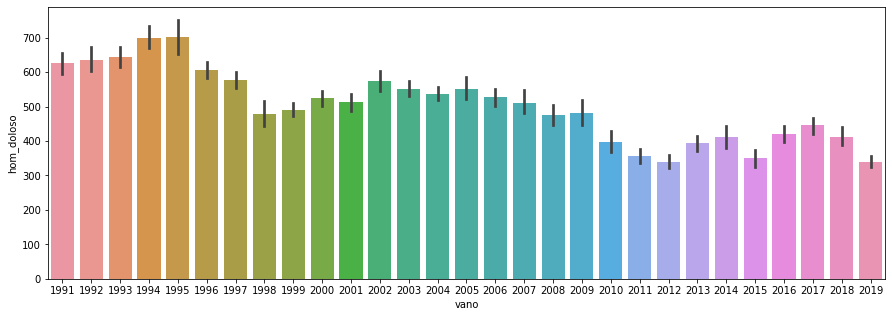

In [286]:
# visualizando o histograma da coluna de homicidios dolosos
fig, (axis1) = plt.subplots(figsize=(15,5))
#Plotando o histograma
sns.barplot(x='vano', y='hom_doloso', data=df_clear, ax=axis1);

Plotando um grafico de linhas para análise do indice de **Roubos em Coletivos**.

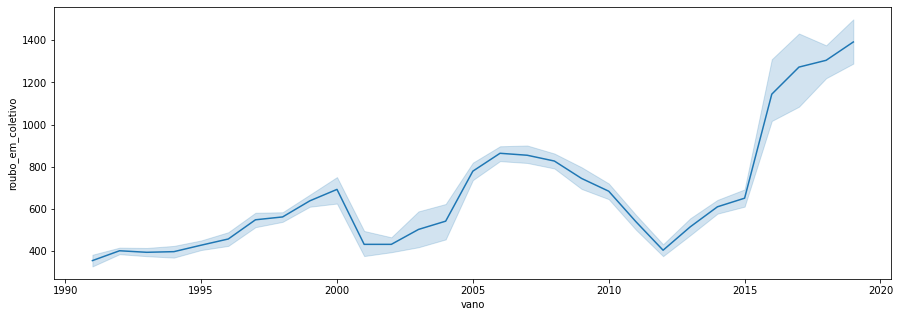

In [287]:
# carregando as configuração para plotar o grafico.
fig, (axis1) = plt.subplots(figsize=(15,5))
# Plotando o grafico de linhas
sns.lineplot(x='vano', y='roubo_em_coletivo', data=df_clear, ax=axis1);

Nota de um crescimento crescimento no indece de assalto realizados em coletivos comparando o inicio e o final do grafico no qual o mesmo tem uma leve diminuição no final.

Plotando um grafico de linhas para análise do indece de **Roubo, Furto e Recuperação de Veiculos Roubados**

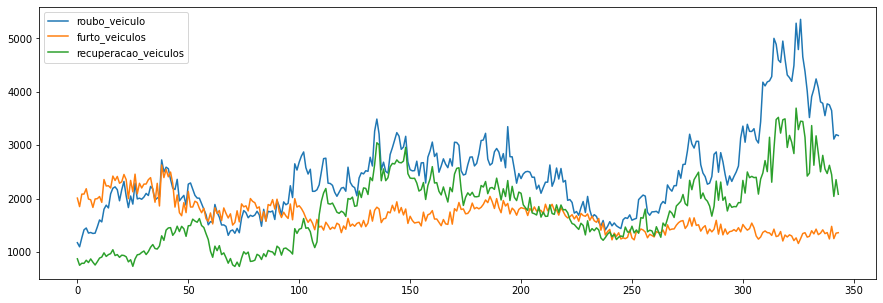

In [288]:
# plotando o grafico de linhas para analise e comparação dos indices
df_clear[['roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']].plot.line(figsize=(15,5));

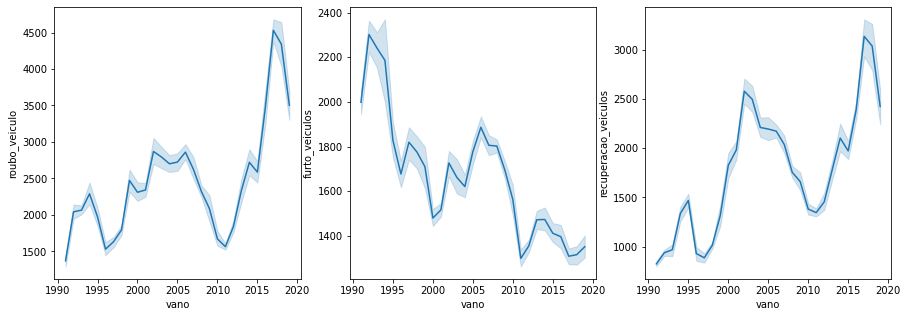

In [289]:
# carregando as configuração para plotar o grafico.
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(15,5))
# plotando um grafico de linhas separadamente para cada indece.
sns.lineplot(x='vano', y='roubo_veiculo', data=df_clear, ax=axis1)
sns.lineplot(x='vano', y='furto_veiculos', data=df_clear, ax=axis2)
sns.lineplot(x='vano', y='recuperacao_veiculos', data=df_clear, ax=axis3);

## Conclusão
O numero de homicidios dolosos registrados no ano de 2019 são os menores comprados com os anos anteriores chegando a maxima de 831 e a minima de 272 registros no em todo o periodos de 1991 a 2019.

O numero de roubos em coletivos sofreu uma crescimento exponencial desde 1991 a 2019.

O roubo de veiculos teve um crescimento de 1991 ate o ano de 2018 vindo a sofre um leve queda no ano de 2019, o furto de veiculos veio sofrendo uma diminuição desde 1991 a 2019, ja a recupeção do veiculos roubados e furtados cresceu desde 1991 a 2018 sefrendo um leve queda em 2019, neste periodo foram recuperados o total de 43% do total de veiculos roubados e furtados.